In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


" Other libraries "
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.linear_model import LogisticRegression # Logistic Regression
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## 1. Data Analysis

### 1.1 data preprocess

In [6]:
hotel_data = pd.read_csv('Data/hotel_bookings.csv')

display(hotel_data.head())
print(hotel_data.info())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
## Summary of numerical features
print("\nInitial Summary of Statistics for numerical columns: ")
display(hotel_data.describe(include = [np.number]).T)

## Summary of categorical features
print("\nInitial Summary of Statistics for categorical columns: ")
display(hotel_data.describe(include = ['O']).T)


Initial Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0



Initial Summary of Statistics for categorical columns: 


,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [13]:
# Find and remove the duplicate records (rows) in hotel booking demand datasets

# check the number of duplicated rows
# no. of rows is identical to other row or rows
print("No. of duplicate rows: ", hotel_data.duplicated(keep='first').sum()) 

# Check for this duplicate rows as a dataframe
display(hotel_data.loc[hotel_data.duplicated(keep='first')])


### Remove the duplicate rows #####
hotel_data = hotel_data.drop_duplicates(keep='first')
# check the dataset dimension
print("\nDimesnion of hotel_data after removing duplicates: ", hotel_data.shape)


No. of duplicate rows:  31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03



Dimesnion of hotel_data after removing duplicates:  (87396, 32)


In [14]:
hotel_data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [15]:
#children: NA -> 0
#country: NA -> 'N.A.'
#agent: NA -> 0
#company: NA -> 0

new_hotel_data=hotel_data.fillna({'children' : 0, 'country' : 'N. A.', 'agent' : 0, 'company' : 0})

### 1.2 analysis

,hotel,reservations,cancelations,check in
0,Resort Hotel,33968,7976,0.765191
1,City Hotel,53428,16049,0.699614


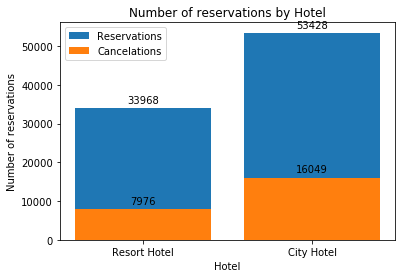

In [21]:
#number of reservations for each hotel

def auto_label(ax, container):
    for c in container:
        height = c.get_height()
        
        ax.annotate('{}'.format(height),
                    xy = (c.get_x() + c.get_width() / 2, height),
                    xytext = (0, 3),  #3 points vertical offset
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')

def show_number_reservations(dataset):
    dict = []
    
    for hotel in dataset.hotel.unique():
        dict.append({'hotel' : hotel, 
                     'reservations' : len(dataset.loc[dataset.hotel == hotel, 'hotel']), 
                     'cancelations' : len(dataset.loc[(dataset.hotel == hotel) & (dataset.is_canceled == 1), 'hotel']),
                    'check in':(1- len(dataset.loc[(dataset.hotel == hotel) & (dataset.is_canceled == 1), 'hotel'])/len(dataset.loc[dataset.hotel == hotel, 'hotel']))})
    
    data = pd.DataFrame(dict)
    
    fig, ax = plt.subplots()
    
    reserv_bar = ax.bar(data.hotel, data.reservations, label = 'Reservations')
    cancel_bar = ax.bar(data.hotel, data.cancelations, label = 'Cancelations')
            
    plt.title('Number of reservations by Hotel')
    plt.xlabel('Hotel')
    plt.ylabel('Number of reservations')
    plt.legend()

    auto_label(ax, reserv_bar)
    auto_label(ax, cancel_bar)
    
    return data

show_number_reservations(new_hotel_data)

### 可以发现，假日酒店预定需求更大，入住率也更高一些

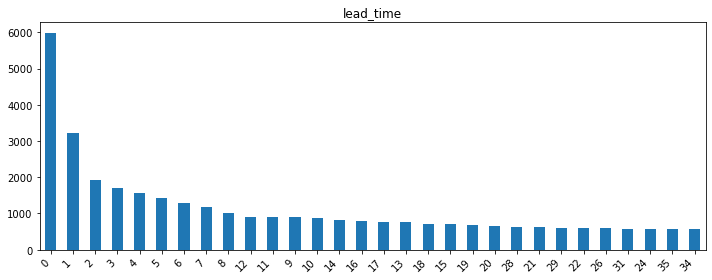

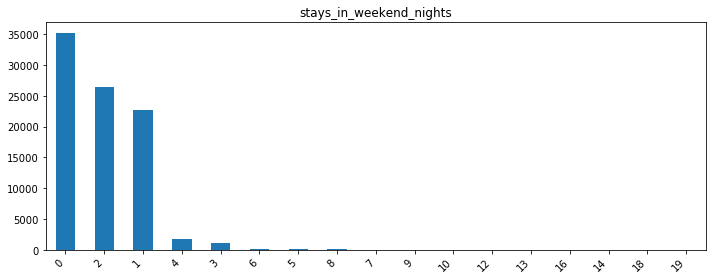

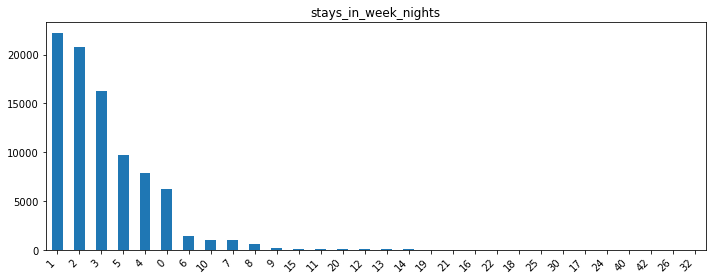

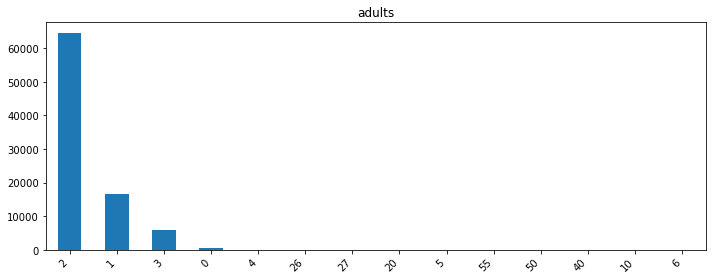

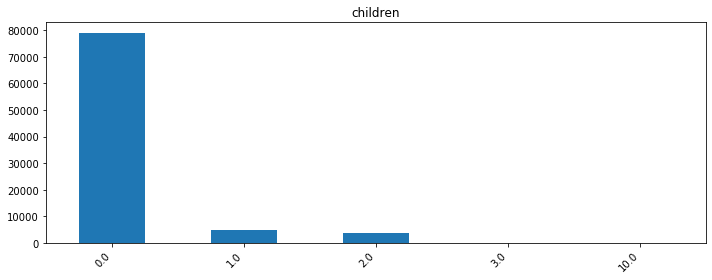

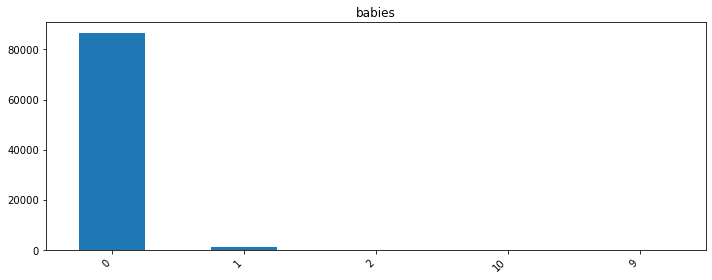

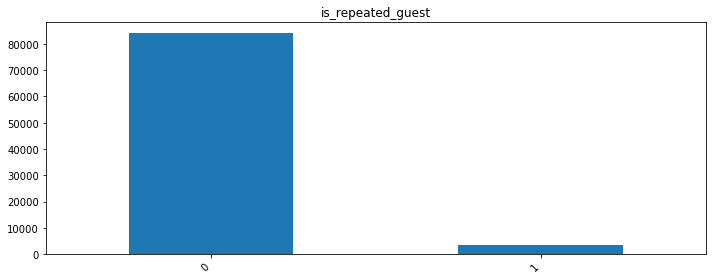

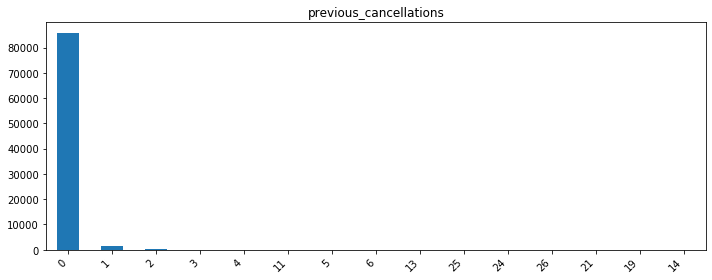

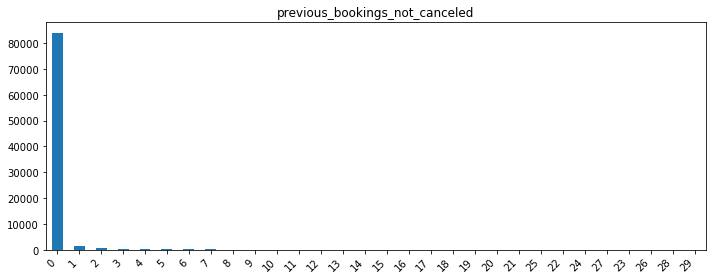

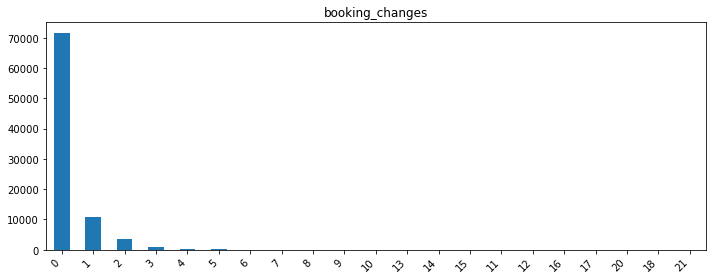

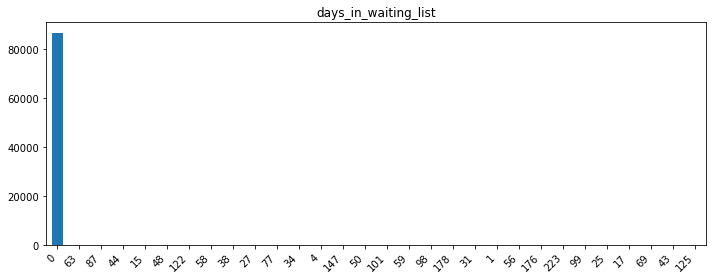

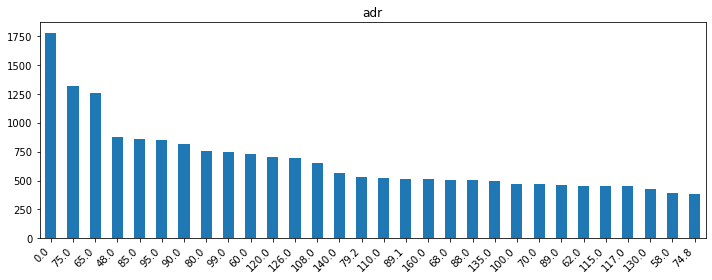

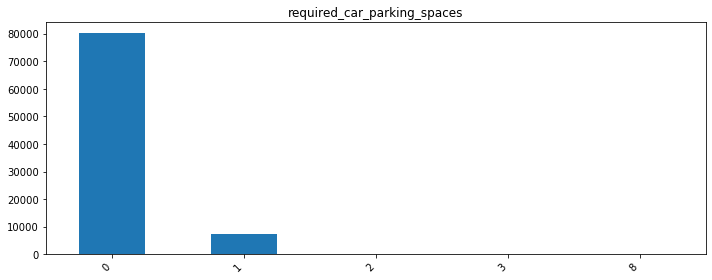

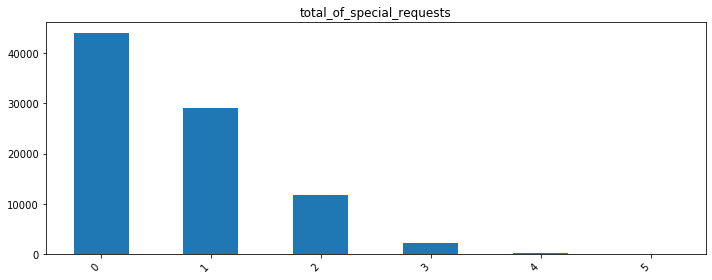

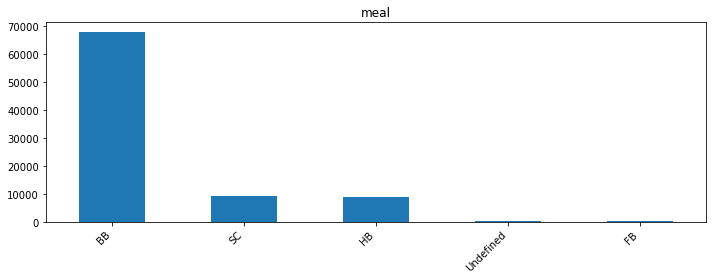

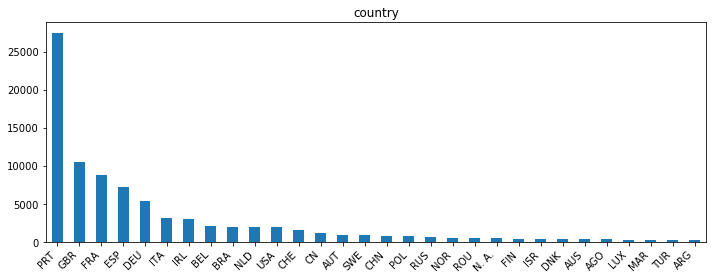

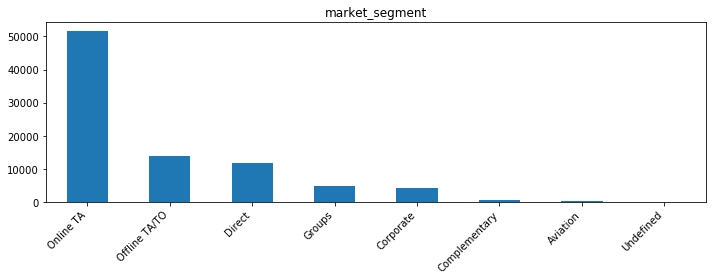

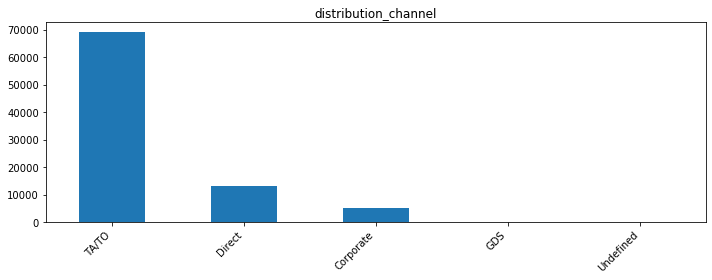

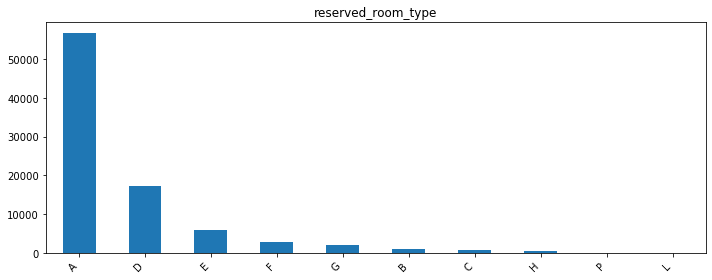

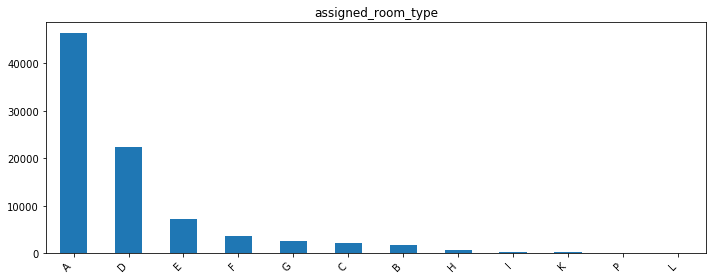

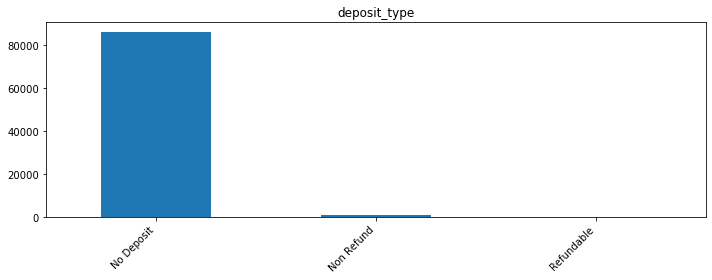

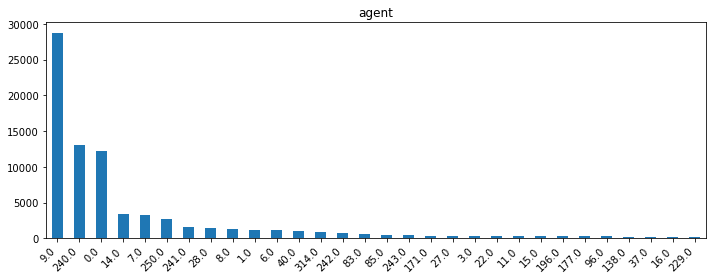

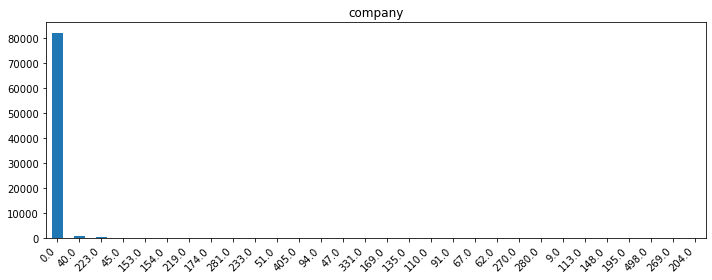

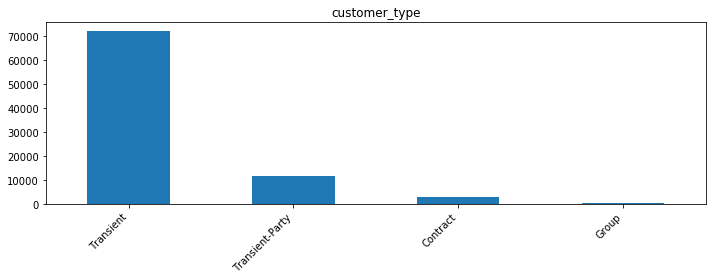

In [44]:
attrs = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
         'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 
         'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 
         'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type',
         'deposit_type', 'agent', 'company', 'customer_type']

def freq_attributes(dataset,canceled, attributes):
    hotels = dataset.hotel.unique()
        
    for attr in attributes:          
            counts = dataset[attr].value_counts()
            
            plt.figure(figsize = (10, 4))
            ax = counts.head(30).plot(kind = 'bar', label = attr)
            ax.set_title( attr )
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
            plt.tight_layout()
            plt.show()
        
freq_attributes(new_hotel_data,True, attrs)

In [25]:
#the average stay in days
def average_stay_days(dataset):
    stay = dataset.loc[dataset.is_canceled == 0, ['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights']] 
    stay['nights'] = stay.stays_in_week_nights + stay.stays_in_weekend_nights    
    stay = stay.groupby('hotel').agg({'nights' : 'mean'})
    
    return stay
print("average stay in days:")
average_stay_days(new_hotel_data)

average stay in days:


,nights
hotel,
City Hotel,2.991760
Resort Hotel,4.200562


## 2.prediction

In [57]:
new_hotel_data.drop(['arrival_date_week_number','meal','agent','company','adr','reservation_status','reservation_status_date'],axis=1,inplace=True)

In [66]:
new_hotel_data.drop(['country'],axis=1,inplace=True)
df = new_hotel_data.reset_index(drop=True)
df.shape
df = pd.get_dummies(df,columns = ['hotel','market_segment', 'distribution_channel', 'reserved_room_type','assigned_room_type','deposit_type','customer_type'],drop_first=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,July,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,737,2015,July,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,7,2015,July,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,13,2015,July,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,July,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
month_to_number={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12 }
df['arrival_date_month']=df['arrival_date_month'].map(month_to_number)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,7,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,737,2015,7,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,7,2015,7,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,13,2015,7,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,7,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0


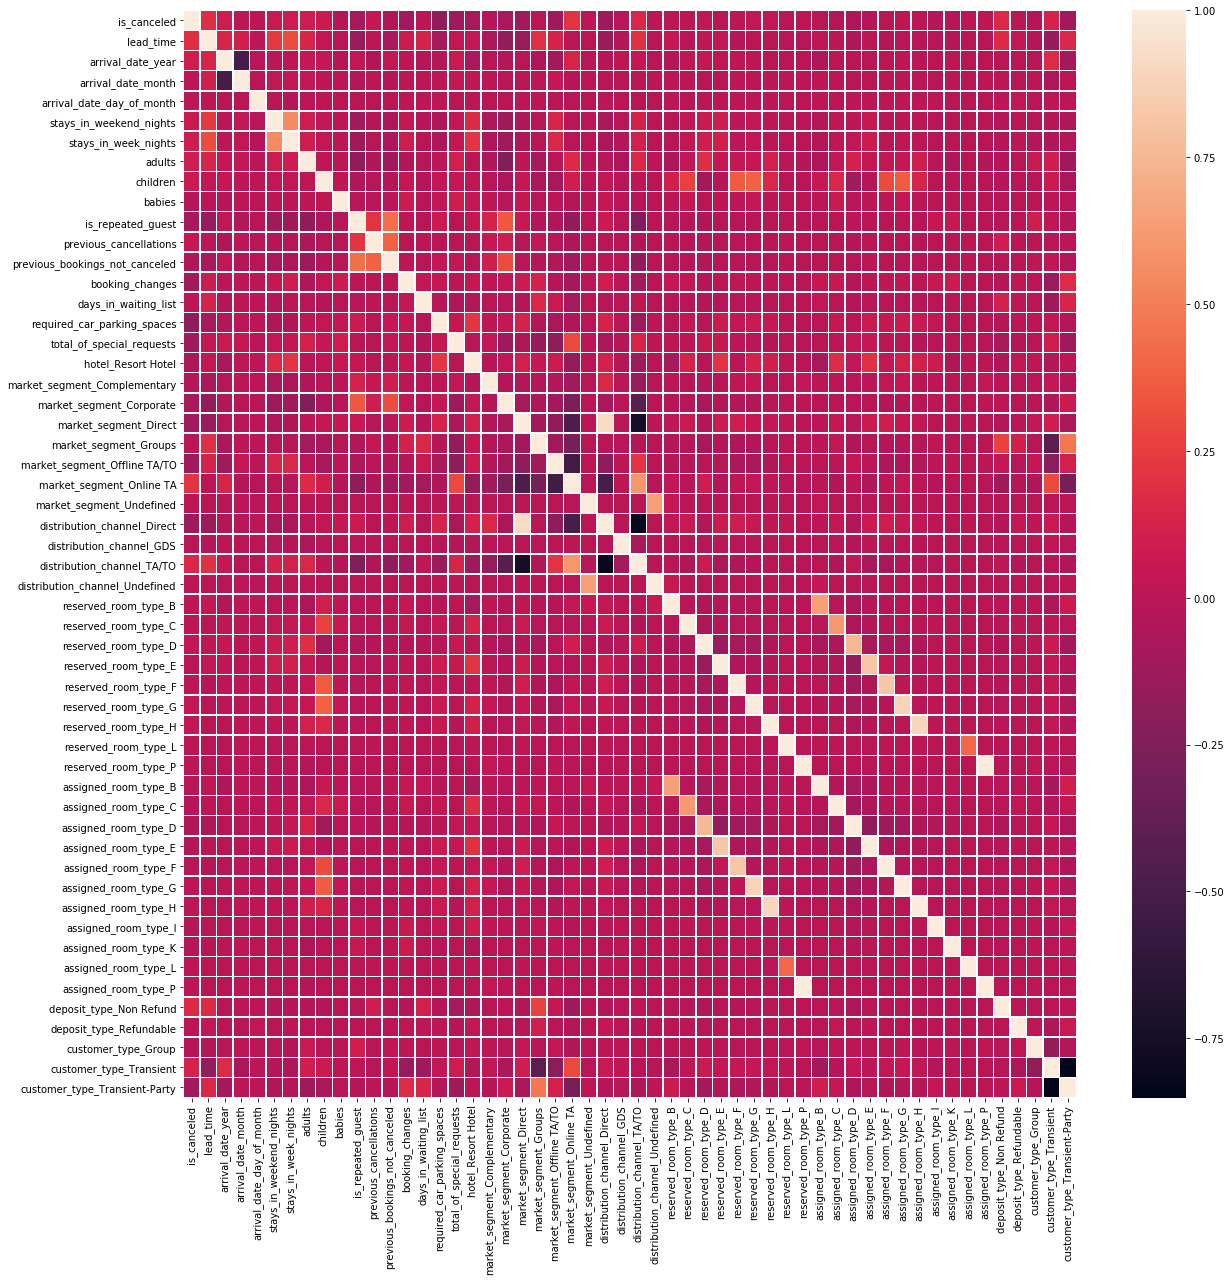

In [68]:

### Correlation

corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, linewidths=.5)

In [69]:
X = df.drop('is_canceled', axis=1) 
y = df.is_canceled 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=0)


In [51]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [75]:
# Logistic regression
# train_pred_log, accuracy_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
#                                                                X_train, 
#                                                                y_train, 
#                                                                     10)
# print("10-fold Cross Validation accuracy: %s" % acc_cv_log)
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [80]:
params = {}
params['penalty'] = ['l1', 'l2']
params['C'] = [0.1, 1, 10]
params

{'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

In [81]:
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [82]:
grid_logreg = GridSearchCV(logreg, params, cv=5, scoring='precision')
grid_logreg.fit(X_train, y_train);

In [83]:
grid_logreg.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [84]:
grid_logreg.best_score_

0.6909777620864284

In [85]:
y_pred_logreg = grid_logreg.predict(X_test)
# y_pred_logreg

In [86]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     12668
           1       0.70      0.40      0.51      4812

    accuracy                           0.79     17480
   macro avg       0.75      0.67      0.69     17480
weighted avg       0.78      0.79      0.77     17480



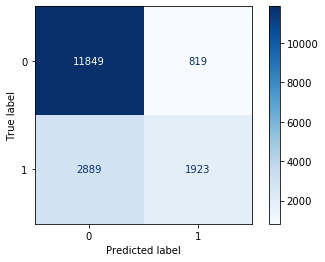

In [87]:
# pass it a trained model: it makes predictions for X_test and compares them to y_test
disp = plot_confusion_matrix(grid_logreg, X_test, y_test, cmap='Blues', values_format='d')